## BA 545 Course Project 2: Machine Team 4 
#### Online Shoppers Purchasing Intentions
##### Michael Disanto, Dawn Massey PhD CPA CGMA, Brian Nicholls
###### Preliminary Base Model (1) - Spring 2020
----------------------------------------------------------------------


#### **Table of Contents:**

0. [Preparing for Analyisis](#part1.0)
1. [Initial Review of the Data](#part1.1)
2. [Adjust the Object & Boolean Data Types for Modeling](#part1.2)
3. [Split and Run the Preliminary Models with All Features](#part1.3)
4. [Evaluate and Compare All the Methods Using Ensemble Ranking](#part1.4)


## 0. Preparing for Analysis  <a name="part1.0"></a>
####  Import the necesary packages for reading, analyzing, tidying, modeling, & evaluating the data

In [1]:
# # TO USE FOR ENTIRE TEAM
# import pandas as pd
# import numpy as np
# from pandas_profiling import ProfileReport
# import statsmodels.api as sm
# from scipy import stats
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

In [2]:
# Excluding Items not in Fairfield Jupiter Lab
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

In [3]:
# Import the necesary packages for reading, analyzing, tidying, modeling, & evaluating the data 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test)

from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)

from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)

# Imputation
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

# Train/Test Split
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()

from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()

from sklearn.svm import SVC 
# svc = SVC(kernel='linear')

from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)

from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)

# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)

# Packages for Over/Under Sampling
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import NearMiss 

import warnings
warnings.filterwarnings('ignore')

# 1. Initial Review of the Data  <a name="part1.1"></a>

In [4]:
# Pull in our original data and a copy for the base model
df = pd.read_csv('online_shoppers_intention.csv', na_values=r'-')
df_base = df.copy()

In [5]:
# Investigate the data types and descriptive statistics of the dataset
display(df_base.info())
display(df_base.describe())
display(df_base.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

None

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# 2. Adjust the Object & Boolean Data Types for Modeling  <a name="part1.2"></a>

In [6]:
# Encode month names to numerical representations
def month_func(month) :
    if month == 'Jan':
        return int(1)
    elif month == 'Feb':
        return int(2)
    elif month == 'Mar':
        return int(3)
    elif month == 'Apr':
        return int(4)
    elif month == 'May':
        return int(5)
    elif month == 'June':
        return int(6)
    elif month == 'Jul':
        return int(7)
    elif month == 'Aug':
        return int(8)
    elif month == 'Sep':
        return int(9)
    elif month == 'Oct':
        return int(10)
    elif month == 'Nov':
        return int(11)
    elif month == 'Dec':
        return int(12)

df_base['Month'] = df_base['Month'].apply(month_func)

In [7]:
# Encode Categorical Features (VisitorType, Weekend) & Target (Revenue)
enc = LabelEncoder()

df_base['VisitorType'] = enc.fit_transform(df_base['VisitorType'])
df_base['Weekend'] = enc.fit_transform(df_base['Weekend'])
df_base['Revenue'] = enc.fit_transform(df_base['Revenue'])

# 3. Split and Run the Preliminary Models with all Features  <a name="part1.3"></a>

In [8]:
# Specify features (X) and target (y) in dataset
X,y = df_base.iloc[:,:-1],df_base.iloc[:,-1]

In [9]:
# Create train test split for X and y
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=500) 

### 3.1 Naive Bayes Model (NB)
>   <b> F1 Score: </b> .86
<br><b> AUC: </b> .85
<br><b> Next Steps: </b> Additional parameter tuning

#### Import Packages

In [10]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#### Specify/Build the Model

In [11]:
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for testing data
y_NB_pred = gnb.predict(X_test)

# Print model accuracy (i.e., how often the classifier is correct)
print("y Accuracy:",metrics.accuracy_score(y_test, y_NB_pred))

y Accuracy: 0.8572587185725872


#### Evaluate the Model

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3158
           1       0.51      0.55      0.53       541

    accuracy                           0.86      3699
   macro avg       0.72      0.73      0.72      3699
weighted avg       0.86      0.86      0.86      3699




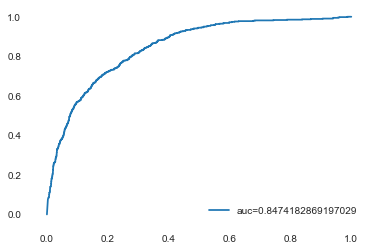

Text(0.5, 257.44, 'Predicted label')

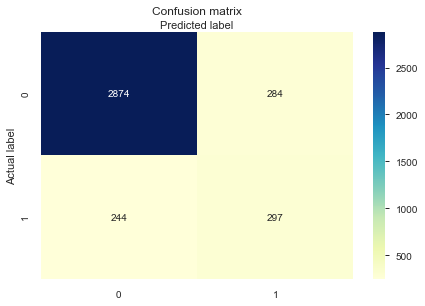

In [12]:
# Create classification report
class_names=[0,1] # name  of classes
print(metrics.classification_report(y_test, y_NB_pred))
print("")

# Compute AUC
y_NB_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_NB_pred_proba)
auc_NB = metrics.roc_auc_score(y_test, y_NB_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc_NB))
plt.legend(loc=4)
plt.show()
print("")

# Create Confusion Matrix/Heatmap
cnf_matrix = metrics.confusion_matrix(y_test, y_NB_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
##Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.2 Decision Tree Model (DT)
>   <b> F1 Score: </b> .87
<br><b> AUC: </b> .77
<br><b> Next Steps: </b> Additional parameter tuning

#### Import Packages

In [13]:
# Load Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

#### Specify/Build the Model

In [14]:
# Create Decision Tree Classifer
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_DT_pred = clf.predict(X_test)

# Print model accuracy (i.e., how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test, y_DT_pred))

Accuracy: 0.8637469586374696


#### Evaluate the Model

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3158
           1       0.53      0.61      0.57       541

    accuracy                           0.86      3699
   macro avg       0.73      0.76      0.74      3699
weighted avg       0.87      0.86      0.87      3699



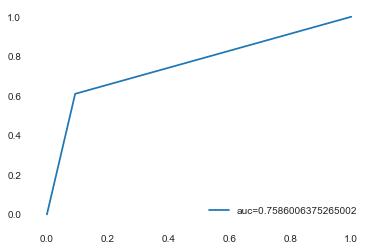

Text(0.5, 257.44, 'Predicted label')

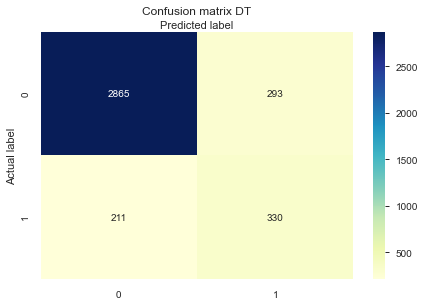

In [15]:
# Create classification report
print(metrics.classification_report(y_test, y_DT_pred))

# Compute AUC
y_DT_pred_proba = clf.predict_proba(X_test)[::,1]
fpr_DT, tpr_DT, _ = metrics.roc_curve(y_test,  y_DT_pred_proba)
auc_DT = metrics.roc_auc_score(y_test, y_DT_pred_proba)
plt.plot(fpr_DT,tpr_DT,label="auc="+str(auc_DT))
plt.legend(loc=4)
plt.show()
print("")

# Print Confusion Matrix/Heatmap
cnf_matrix_DT = metrics.confusion_matrix(y_test, y_DT_pred)
cnf_matrix_DT
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
##Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DT), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix DT', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.3 Random Forest Model (RF)
>   <b> F1 Score: </b> .90
<br><b> AUC: </b> .93
<br><b> Next Steps: </b> Additional parameter tuning

#### Import Packages

In [16]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#### Specify/Build theModel

In [17]:
# Create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

y_RF_pred = rfc.predict(X_test)

# Print model accuracy (i.e., how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test, y_RF_pred))

Accuracy: 0.9051094890510949


#### Evaluate the Model

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      3158
           1       0.72      0.58      0.64       541

    accuracy                           0.91      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.90      0.91      0.90      3699



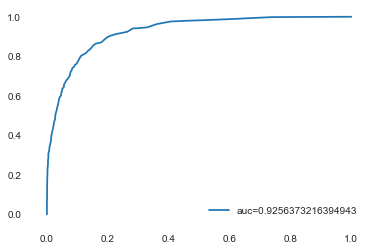

Text(0.5, 257.44, 'Predicted label')

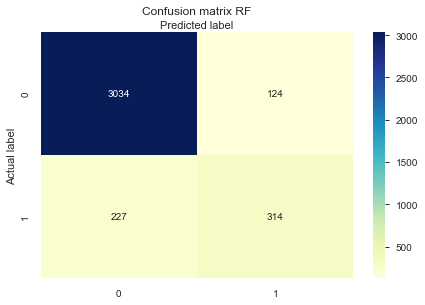

In [18]:
#Create classification report
print(classification_report(y_test, y_RF_pred))

#Compute AUC
y_RF_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_test,  y_RF_pred_proba)
auc_RF = metrics.roc_auc_score(y_test, y_RF_pred_proba)
plt.plot(fpr_RF,tpr_RF,label="auc="+str(auc_RF))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix/Heatmap
cnf_matrix_RF = metrics.confusion_matrix(y_test, y_RF_pred)
cnf_matrix_RF
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
##Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RF', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.4 Support Vector Machines (SVM) Classification Model (SVC)
>   <b> F1 Score: </b> .79
<br><b> AUC: </b> .83
<br><b> Next Steps: </b> SVC ensemble classifiers 

#### Import Packages

In [19]:
#Import Support Vector Machines classifier model
from sklearn import svm
svc = svm.SVC(kernel='rbf',cache_size=7000,gamma= 'scale', C=1, probability =True, degree = 3) # gamma= 0.001 , kernel='poly', 'rbf',‘linear’

#### Build/Assess the Model

In [20]:
#Specify the Model
svc = svm.SVC(kernel='rbf',cache_size=7000,gamma= 'scale', C=1, probability =True, degree = 3) # gamma= 0.001 , kernel='poly', 'rbf',‘linear’

#Train the model using the training sets
svc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svc = svc.predict(X_test)

# Print model accuracy (i.e., how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))

Accuracy: 0.8553663152203298


#### Evaluate the Model

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      3158
           1       1.00      0.01      0.02       541

    accuracy                           0.86      3699
   macro avg       0.93      0.51      0.47      3699
weighted avg       0.88      0.86      0.79      3699



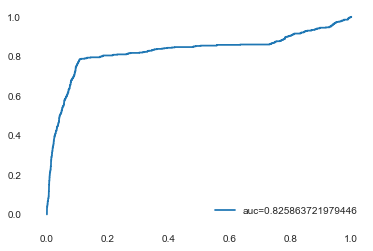

Text(0.5, 257.44, 'Predicted label')

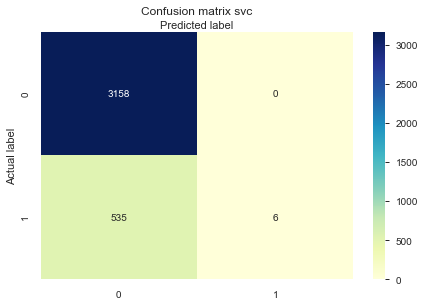

In [21]:
#Create classification report
print(classification_report(y_test, y_pred_svc))

#Compute AUC
y_pred_svc_proba = svc.predict_proba(X_test)[::,1]
fpr_SVM, tpr_SVM, _ = metrics.roc_curve(y_test,  y_pred_svc_proba)
auc_SVM = metrics.roc_auc_score(y_test, y_pred_svc_proba)
plt.plot(fpr_SVM,tpr_SVM,label="auc="+str(auc_SVM))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix/Heatmap
cnf_matrix_svc = metrics.confusion_matrix(y_test, y_pred_svc)
cnf_matrix_svc
class_names_svc=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_svc = np.arange(len(class_names_svc))
plt.xticks(tick_marks_svc, class_names_svc)
plt.yticks(tick_marks_svc, class_names_svc)
##Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix svc', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.5. XGBoost Model (XGB)
>   <b> F1 Score: </b> .90
<br><b> AUC: </b> .92
<br><b> RMSE: </b> .32
<br><b> Next Steps: </b> Additional parameter tuning


#### Import Packages

In [22]:
#Import Extreme Gradient Boost (XGBoost) Package
import xgboost as xgb

#### Specify/Build the Model

In [23]:
#Instantiate an XGBoost Classifer Model
XGB_class = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

#Put Data into structure for XGBoost
data_dmatrix = xgb.DMatrix(data=X,label=y)

#Train the model
XGB_class.fit(X_train, y_train)

#Predict the response for test dataset
y_XGB_pred = XGB_class.predict(X_test)

# Print model accuracy (i.e., how often the classifier is correct)
print("y Accuracy:",metrics.accuracy_score(y_test, y_XGB_pred))

y Accuracy: 0.902676399026764


#### Evaluate the Model

XGBoost's RMSE is: 0.311967

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3158
           1       0.70      0.58      0.64       541

    accuracy                           0.90      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.90      0.90      0.90      3699



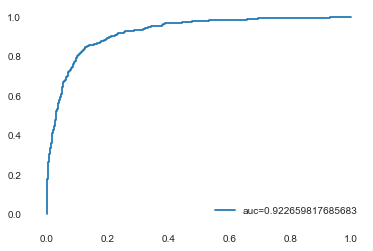

Text(0.5, 257.44, 'Predicted label')

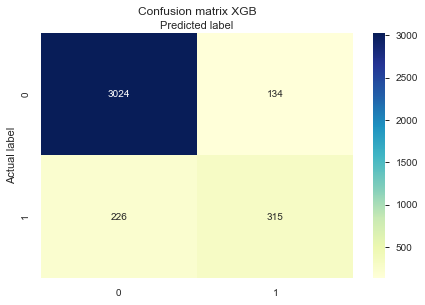

In [24]:
# Calculate RMSE
rmse_XGB = np.sqrt(mean_squared_error(y_test, y_XGB_pred))
print("XGBoost's RMSE is: %f" % (rmse_XGB))
print("")

# Create classification report
print(metrics.classification_report(y_test, y_XGB_pred, labels=class_names))

# Compute AUC
y_XGB_pred_proba = XGB_class.predict_proba(X_test)[::,1]
fpr_XGB, tpr_XGB, _ = metrics.roc_curve(y_test,  y_XGB_pred_proba)
auc_XGB = metrics.roc_auc_score(y_test, y_XGB_pred_proba)
plt.plot(fpr_XGB,tpr_XGB,label="auc="+str(auc_XGB))
plt.legend(loc=4)
plt.show()
print("")

# Print Confusion Matrix/Heatmap
cnf_matrix_XGB = metrics.confusion_matrix(y_test, y_XGB_pred)
cnf_matrix_XGB
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
##Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_XGB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix XGB', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.6 Neural Network Model (NN)
>   <b> F1 Score: </b> .88
<br><b> AUC: </b> .87
<br><b> Next Steps: </b> Additional parameter tuning

#### Import Packages

In [25]:
# Import the model
from sklearn.neural_network import MLPClassifier

#### Specify/Build the Model

In [26]:
# Instantiate an multilayer perceptron model
##mlp = MLPClassifier(hidden_layer_sizes = (3,1),solver='sgd',learning_rate_init= 0.01, max_iter=50)
mlp= MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9, 
beta_2=0.999, early_stopping=False, epsilon=1e-08,       
hidden_layer_sizes=(10), learning_rate='adaptive',      
learning_rate_init=0.01, max_iter=10, momentum=0.9,       
nesterovs_momentum=True, power_t=0.5, random_state=1000,       
shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,       
verbose=False, warm_start=True)

# Train the model
mlp.fit(X_train, y_train)

# Predict response for test data
y_pred_nn = mlp.predict(X_test)

# Print model accuracy (i.e., how often the classifier is correct)
print("Accuracy_nn:",metrics.accuracy_score(y_test, y_pred_nn))

Accuracy_nn: 0.8821303054879697


#### Evaluate the Model

              precision    recall  f1-score   support

           0       0.89      0.99      0.93      3158
           1       0.79      0.26      0.39       541

    accuracy                           0.88      3699
   macro avg       0.84      0.63      0.66      3699
weighted avg       0.87      0.88      0.86      3699



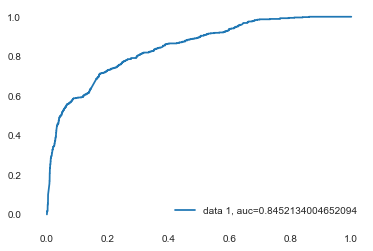

Text(0.5, 257.44, 'Predicted label')

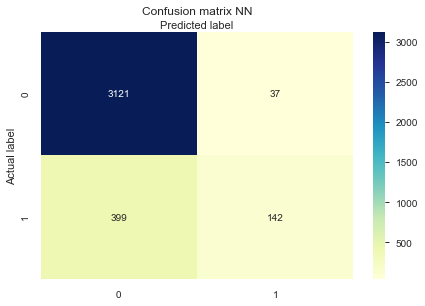

In [27]:
# Create classification report
print(classification_report(y_test, y_pred_nn))

# Compute AUC
y_pred_proba_nn = mlp.predict_proba(X_test)[::,1]
fpr_nn, tpr_nn, _ = metrics.roc_curve(y_test,  y_pred_proba_nn)
auc_nn = metrics.roc_auc_score(y_test, y_pred_proba_nn)
plt.plot(fpr_nn,tpr_nn,label="data 1, auc="+str(auc_nn))
plt.legend(loc=4)
plt.show()
print("")

# Print Confusion Matrix/Heatmap
cnf_matrix_nn = metrics.confusion_matrix(y_test, y_pred_nn)
class_names_nn=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_nn = np.arange(len(class_names_nn))
plt.xticks(tick_marks_nn, class_names_nn)
plt.yticks(tick_marks_nn, class_names_nn)
##Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix NN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.7 Logistic Regression Model

>   <b> F1 Score: </b> .87
<br><b> AUC: </b> .83
<br><b> Next Steps: </b> Additional parameter tuning


#### Import Packages

In [28]:
# Import Logistic Regression package
from sklearn.linear_model import LogisticRegression

#### Specify/Build the Model

In [29]:
# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train,y_train)

# Predict response for test data
y_LR_pred=logreg.predict(X_test)

# Print model accuracy (i.e., how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test, y_LR_pred))

Accuracy: 0.8869964855366316


#### Evaluate the Model

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      3158
           1       0.72      0.37      0.49       541

    accuracy                           0.89      3699
   macro avg       0.81      0.67      0.71      3699
weighted avg       0.87      0.89      0.87      3699



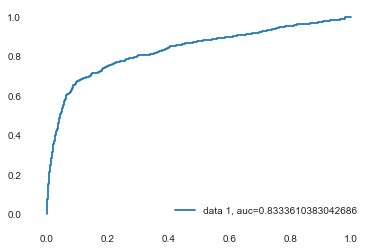

Text(0.5, 257.44, 'Predicted label')

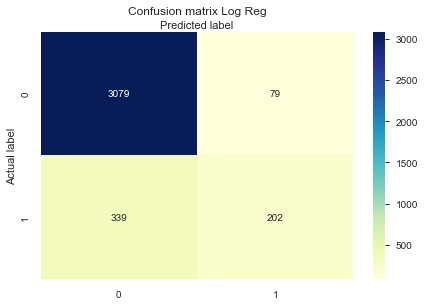

In [30]:
# Create Classification Report
print(classification_report(y_test, y_LR_pred))

# Compute AUC
y_LR_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr_LR, tpr_LR, _ = metrics.roc_curve(y_test,  y_LR_pred_proba)
auc_LR = metrics.roc_auc_score(y_test, y_LR_pred_proba)
plt.plot(fpr_LR,tpr_LR,label="data 1, auc="+str(auc_LR))
plt.legend(loc=4)
plt.show()

# Print the Confusion Matrix/Heatmap
cnf_matrix_LogR = metrics.confusion_matrix(y_test, y_LR_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
##Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_LogR), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Log Reg', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.8 K-Means Model

#### Import Packages

In [31]:
# Import K-Means package
from sklearn.cluster import KMeans

#### Specify/Build the Model

In [32]:
# Instantiate the model (using the default parameters)
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto') # 2 clusters, sale or no sale
X_kmeans = np.array(X_train)
y_kmeans = np.array(y_train)

# Train the model
kmeans.fit(X_kmeans)

# Predict response for test data
correct = 0
for i in range(len(X_kmeans)):
    predict_me = np.array(X_kmeans[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y_kmeans[i]:
        correct += 1
        
# Calculate model accuracy
kmeans_accuracy = (correct/len(X_kmeans))

# Print model accuracy (i.e., how often the classifier is correct)
print("Accuracy:",kmeans_accuracy)

Accuracy: 0.8110300081103001


# 4. Evaluate and Compare All the Methods Using Ensemble Ranking  <a name="part1.4"></a>

### The foregoing pre-processing results can be summarized in the following chart:

In [33]:
from sklearn.metrics import f1_score
print("F1 Score - Naive Bayes:         ", '%05.4f' % f1_score(y_test, y_NB_pred, average='weighted'),"          | AUC - Naive Bayes:         ",  '%05.4f' % auc_NB)
print("F1 Score - Decision Tree:       ",  '%05.4f' % f1_score(y_test, y_DT_pred, average='weighted'),"          | AUC - Decision Tree:       ",  '%05.4f' % auc_DT)
print("F1 Score - Random Forest:       ",  '%05.4f' % f1_score(y_test, y_RF_pred, average='weighted'),"          | AUC - Random Forest:       ",  '%05.4f' % auc_RF)
print("F1 Score - SVM Classifier:      ",  '%05.4f' % f1_score(y_test, y_pred_svc, average='weighted'),"          | AUC - SVM Classifier:      ",  '%05.4f' % auc_SVM)
print("F1 Score - XGBoost:             ",  '%05.4f' % f1_score(y_test, y_XGB_pred, average='weighted'),"          | AUC - XGBoost:             ",  '%05.4f' % auc_XGB)
print("F1 Score - Neural Network:      ", '%05.4f' % f1_score(y_test, y_pred_nn, average='weighted'),"          | AUC - Neural Network:      ",  '%05.4f' % auc_nn)
print("F1 Score - Logistic Regression: ",  '%05.4f' % f1_score(y_test, y_LR_pred, average='weighted'),"          | AUC - Logistic Regression: ",  '%05.4f' % auc_LR)
print("")
print("Accuracy Score - K-Means:       ", '%05.4f' % (kmeans_accuracy))

F1 Score - Naive Bayes:          0.8593           | AUC - Naive Bayes:          0.8474
F1 Score - Decision Tree:        0.8677           | AUC - Decision Tree:        0.7586
F1 Score - Random Forest:        0.9009           | AUC - Random Forest:        0.9256
F1 Score - SVM Classifier:       0.7903           | AUC - SVM Classifier:       0.8259
F1 Score - XGBoost:              0.8989           | AUC - XGBoost:              0.9227
F1 Score - Neural Network:       0.8557           | AUC - Neural Network:       0.8452
F1 Score - Logistic Regression:  0.8714           | AUC - Logistic Regression:  0.8334

Accuracy Score - K-Means:        0.8110


>lr 0.367 (0.065)
>xgb 0.548 (0.064)
>tree 0.562 (0.066)
>svm 0.000 (0.002)
>nn 0.140 (0.106)
>bayes 0.566 (0.062)
>rforest 0.544 (0.059)


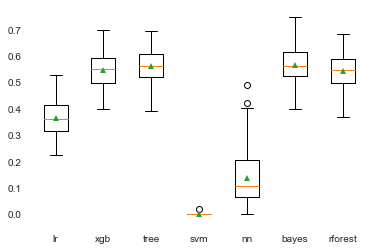

In [34]:
# Compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
import xgboost as xgb


# Obtain a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = logreg
    models['xgb'] = XGB_class
    models['tree'] = clf
    models['svm'] = svc
    models['nn'] = mlp
    models['bayes'] = gnb
    models['rforest'] = rfc
    return models

# Evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=500)
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# Define the dataset
X, y = X_test,y_test
##Get the models to evaluate
models = get_models()
##Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
##Plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### In light of the above, before we pre-processed the data in any meaningful way (i.e., other than encoding non-numerical values
### to numerical values), XGB performed the best, closely followed by Random Forest and then Decision Tree. SVM and Neural
### Networks provided inferior results. Further model tuning will bear out whether these findings hold as we continue by
### pre-processing our data in the next pipeline. 